<a href="https://colab.research.google.com/github/Ananassio/Data-Minig-Lab/blob/main/Week_4/Lab_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Face recognition with eigenfaces 

### Data: ["Labeled Face in the Wild"](http://vis-www.cs.umass.edu/lfw/index.html)

In [8]:
# basic imports
from time import time #to compute runtimes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd

### Get Data


In [2]:
from sklearn.datasets import fetch_lfw_people #data is part of Scikit Learn

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) #get data - take some time

In [3]:
# get data shapes
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


In [4]:
# get data and labels
X = lfw_people.data #data
y = lfw_people.target #labels

In [5]:
n_features = X.shape[1] #get size of images
print("number of pixels per image:", n_features)

target_names = lfw_people.target_names #get unique IDs of people
n_classes = target_names.shape[0]

print("names of people", target_names)
print("number of people in DB:", n_classes)

number of pixels per image: 1850
names of people ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
number of people in DB: 7


Text(0.5, 1.0, 'George W Bush')

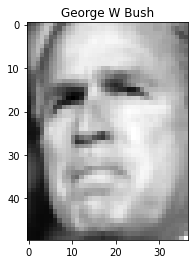

In [6]:
#vis example
plt.gray()
plt.imshow(X[12,:].reshape(h,w))
plt.title(target_names[y[12]])

## ML Model

### Task 1: Split in test and train set
* 20% test - 80% train -> use SKL split function!

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Task 2: Train and evaluate baseline Classifier
* use ***black box*** SVM Algorithm with default parameters -> [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC()

In [23]:
svc.fit(X_train,y_train)

SVC()

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,svc.predict(X_test))

0.7906976744186046

### Task 3: Apply PCA to train data
* Plot Eigenvalues (explained variance) and find cut-off 
* Visualize the first 8 Eigenvectors
* Project all data (train+test) to Eigen-Face-Space
* Reconstruct a sample Face from Eigenfaces 

HINT: use *whitenig* in the PCA -> normalization of the components

-> see [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [31]:
from sklearn.decomposition import PCA 

In [32]:
pca = PCA(whiten=True)
pca.fit(X_train)

PCA(whiten=True)

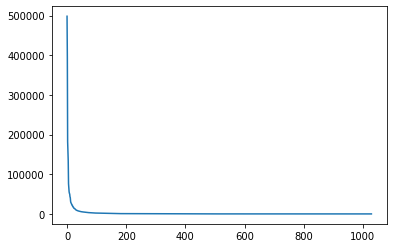

In [33]:
#plot Eigen-Values
plt.plot(pca.explained_variance_)

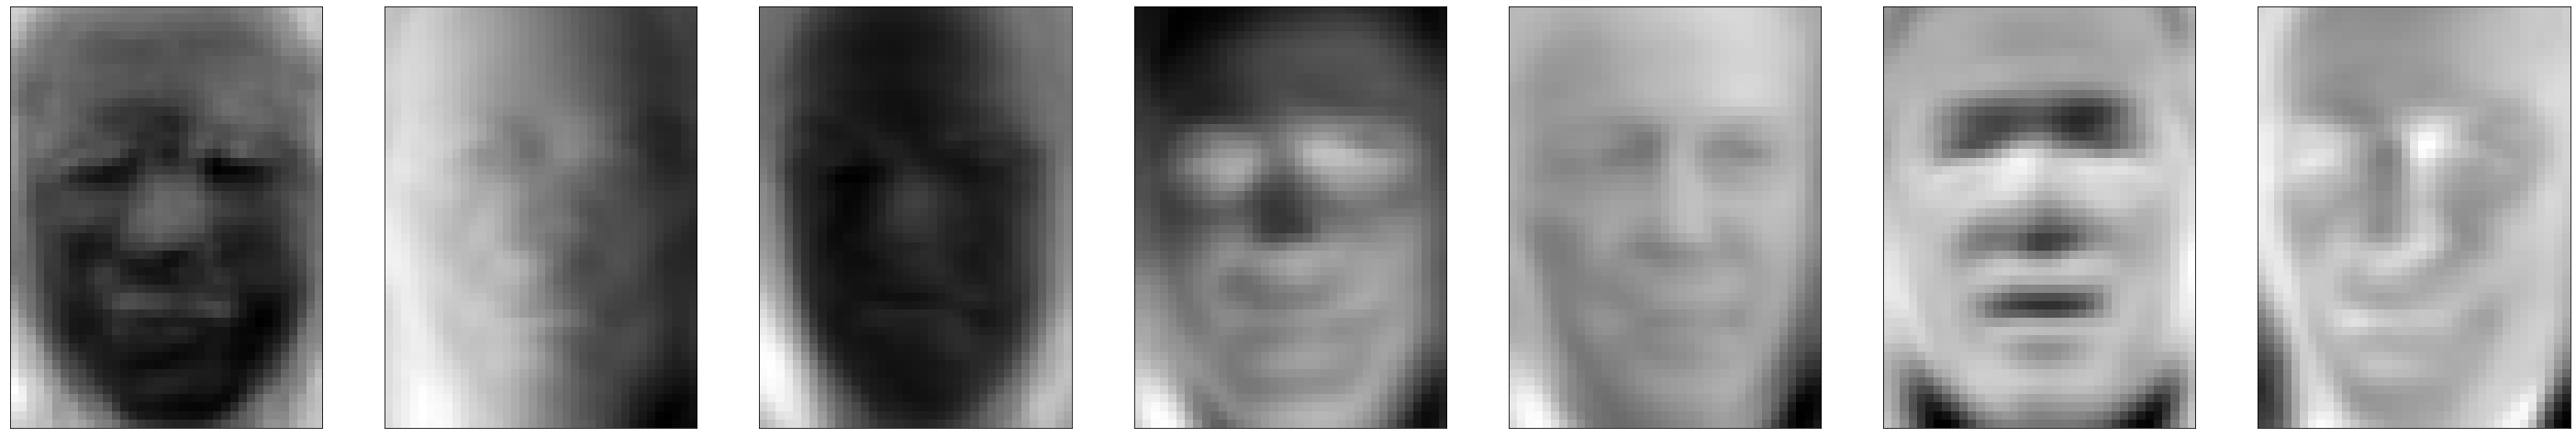

In [34]:
#have look at the first 8 Eigen-Vectors
fig, ax = plt.subplots(1, 7, figsize=(h,w))
for i in range(7):
    ax[i].imshow(pca.components_[i].reshape(h,w))
    ax[i].set_yticks([])
    ax[i].set_xticks([])

In [38]:
# transform singe sample
s = pca.transform(X[135].reshape(1, -1)) #tricky: SKL PCA expects multiple matrix of samples

In [40]:
#manual reconstruct
s_new = s[0,0]*pca.components_[0].reshape(h,w)
for i in range(1,10):
    s_new+=s[0,i]*pca.components_[i].reshape(h,w)

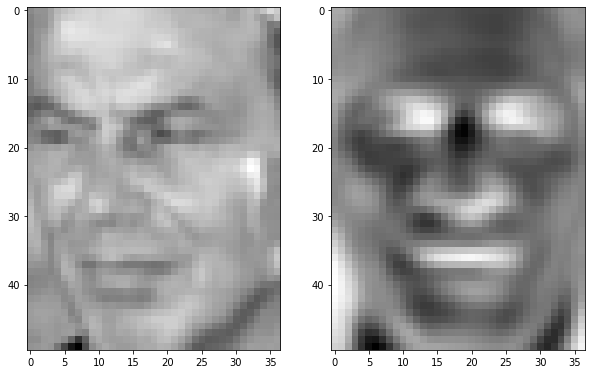

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(X[135].reshape(h,w))
ax[1].imshow(s_new)

### Task 4: Train an SVM on the Eigen-Face representation 
* evaluate model on test